17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 98s 6us/step


C:\Users\rashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.6055 - loss: 0.6315 - val_accuracy: 0.8596 - val_loss: 0.3215
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9229 - loss: 0.2037 - val_accuracy: 0.8464 - val_loss: 0.3432
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9886 - loss: 0.0590 - val_accuracy: 0.8602 - val_loss: 0.3702
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9986 - loss: 0.0142 - val_accuracy: 0.8496 - val_loss: 0.4494
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9986 - loss: 0.0071 - val_accuracy: 0.8546 - val_loss: 0.4621
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8545 - loss: 0.4700

Test Accuracy: 0.86


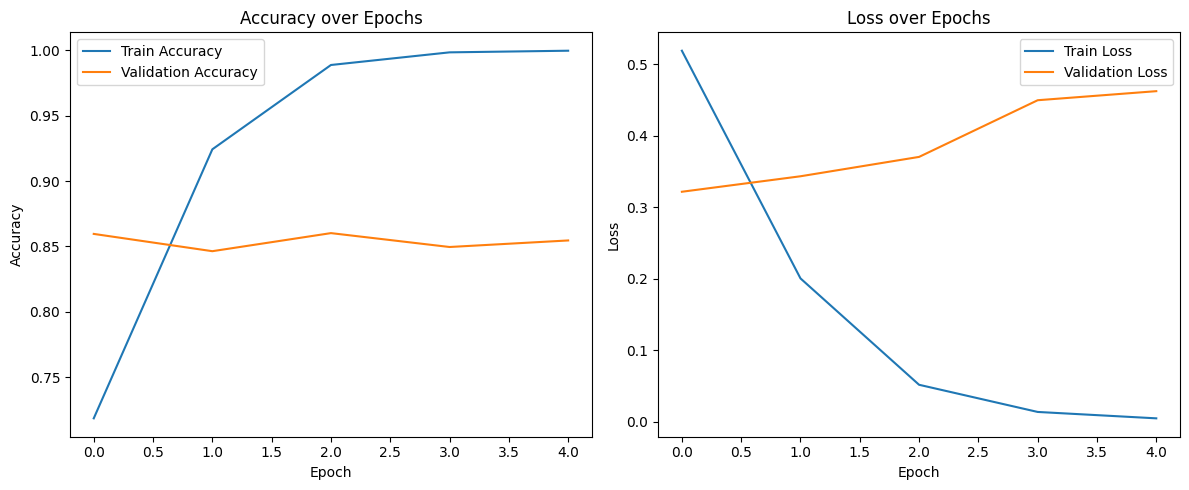

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 9s 6us/step


Sample Predictions on Test Data:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Review 1:
please give this one a miss br br and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite so all you madison fans give this a miss...

Actual Label: Negative
Predicted Label: Negative
--------------------------------------------------------------------------------
Review 2:
psychological it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns do

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Load IMDB dataset
vocab_size = 10000  # Only consider the top 10,000 words
maxlen = 200        # Limit each review to 200 words
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform length
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Build the DNN model
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Word index decoding utility
word_index = keras.datasets.imdb.get_word_index()
index_word = {index + 3: word for word, index in word_index.items()}
index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>"
index_word[3] = "<UNUSED>"

def decode_review(sequence):
    return ' '.join([index_word.get(i, '?') for i in sequence])

# Clean decoding function (removes <PAD>, <START>)
def decode_clean_review(sequence):
    cleaned_tokens = [token for token in sequence if token > 3]
    return decode_review(cleaned_tokens)

# Sample predictions on test data
print("\n\nSample Predictions on Test Data:\n")
num_samples_to_show = 5
predictions = model.predict(x_test[:num_samples_to_show])

for i in range(num_samples_to_show):
    decoded = decode_clean_review(x_test[i])
    actual_label = "Positive" if y_test[i] == 1 else "Negative"
    predicted_label = "Positive" if predictions[i] >= 0.5 else "Negative"
    print(f"Review {i+1}:")
    print(decoded[:500] + "...\n")
    print(f"Actual Label: {actual_label}")
    print(f"Predicted Label: {predicted_label}")
    print("-" * 80)
